In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df =pd.read_csv("/Weather Data.csv")

In [ ]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [ ]:
weather_distribution =df.value_counts()

print("Distribution of Weather Classes:")
print(weather_distribution)

Distribution of Weather Classes:
Date/Time       Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  Press_kPa  Weather      
9/9/2012 16:00   17.9    8.4              54         22               48.3           100.71     Mainly Clear     1
9/9/2012 15:00   17.6    8.9              57         17               48.3           100.67     Mostly Cloudy    1
9/9/2012 14:00   18.1    8.4              53         19               48.3           100.67     Mostly Cloudy    1
9/9/2012 13:00   17.3    8.6              57         11               48.3           100.68     Mainly Clear     1
9/9/2012 12:00   17.3    8.9              58         22               48.3           100.65     Mainly Clear     1
                                                                                                                ..
1/1/2012 13:00   0.2    -1.7              87         13               4.8            100.58     Fog              1
1/1/2012 12:00  -0.2    -2.0              88        

In [ ]:
df.isnull()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8779,False,False,False,False,False,False,False,False
8780,False,False,False,False,False,False,False,False
8781,False,False,False,False,False,False,False,False
8782,False,False,False,False,False,False,False,False


In [ ]:
# 1. Show the distribution of the 'Weather' classes.
print("\n### Distribution of Target Variable 'Weather'")
weather_counts = df['Weather'].value_counts()
print(weather_counts.head(10).to_markdown(numalign="right", stralign="left"))
print(f"\nTotal unique weather types: {len(weather_counts)}")


### Distribution of Target Variable 'Weather'
| Weather       |   count |
|:--------------|--------:|
| Mainly Clear  |    2106 |
| Mostly Cloudy |    2069 |
| Cloudy        |    1728 |
| Clear         |    1326 |
| Snow          |     390 |
| Rain          |     306 |
| Rain Showers  |     188 |
| Fog           |     150 |
| Rain,Fog      |     116 |
| Drizzle,Fog   |      80 |

Total unique weather types: 50


In [ ]:
# 2. Identify any obvious data quality issues.
# 'Date/Time' cannot be used as a feature, or needs preprocessing.
# All numeric columns contain no null values (according to df.info()).
print("All columns contain no null values.")
print("The 'Date/Time' column will need to be dropped before model training.")

All columns contain no null values.
The 'Date/Time' column will need to be dropped before model training.


In [ ]:
# 1. Separate Target (y) and Features (X).
# 'Weather' is our target.
y = df['Weather']


In [ ]:
# 1. Drop the non-feature columns ('Date/Time' and 'Weather') to create the feature set X.
# This explicitly removes the problematic 'Date/Time' column.
X = df.drop(columns=['Date/Time', 'Weather'], axis=1, errors='ignore')

In [ ]:
# 2. Force remaining columns to numeric and handle any non-numeric exceptions by converting to NaN.
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

In [ ]:
# 3. Filter X to ensure only columns with numeric data types are kept.
# This is an essential safety step to prevent any lingering 'object' type columns.
X = X.select_dtypes(include=np.number)

In [ ]:
# 4. Drop any rows that might contain NaN (which resulted from 'coerce' in step 2), and sync y.
initial_length = len(X)
X = X.dropna()
y = y[X.index]
print(f"Rows dropped due to non-numeric entries in features: {initial_length - len(X)}")


print(f"\nFeature columns (X): {list(X.columns)}")
print(f"Target variable name (y): {y.name}")
print(f"Records after data cleaning (X and y synced): {len(X)}")


Rows dropped due to non-numeric entries in features: 0

Feature columns (X): ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
Target variable name (y): Weather
Records after data cleaning (X and y synced): 8784


In [ ]:
# 2. Perform Train-Test Split.
# 70% for training, 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nRecords in training set: {len(X_train)}")
print(f"Records in test set: {len(X_test)}")



Records in training set: 6148
Records in test set: 2636


In [ ]:
# --- Modeling (Decision Trees) ---

# Define various max_depth values.
depths = list(range(1, 10)) + [None]
results = []

In [ ]:
# Train models and evaluate performance.
for depth in depths:
    # Create and train the Decision Tree Classifier.
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    # The fit function will now only receive clean, numerical data (X_train)
    model.fit(X_train, y_train)

    # Train Accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test Accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Record results.
    results.append({
        'Max Depth': depth,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


In [ ]:
# Convert results to a DataFrame.
results_df = pd.DataFrame(results)

print("\n### Model Performance with Different Max Depths")
print(results_df.to_markdown(index=False, numalign="right", stralign="left"))



### Model Performance with Different Max Depths
|   Max Depth |   Train Accuracy |   Test Accuracy |
|------------:|-----------------:|----------------:|
|           1 |         0.272284 |        0.264795 |
|           2 |         0.312622 |        0.292109 |
|           3 |         0.327098 |        0.325493 |
|           4 |         0.374919 |        0.380501 |
|           5 |         0.390371 |         0.38088 |
|           6 |         0.423064 |        0.400607 |
|           7 |         0.455921 |        0.410091 |
|           8 |         0.500651 |        0.413126 |
|           9 |         0.548959 |        0.403642 |
|         nan |                1 |        0.439302 |


In [ ]:
# --- Analysis & Conclusion ---

# 1. Compare the effects of model depth.
print("\n### Comparison of Depth Effects (Overfitting vs. Generalization)")

# Find the best Test Accuracy.
best_row = results_df.loc[results_df['Test Accuracy'].idxmax()]

# Summary of Best Performance
print(f"Best Test Accuracy ({best_row['Test Accuracy']:.4f}) achieved at:")
print(f"    - Max Depth: {best_row['Max Depth']}")
print(f"    - Train Accuracy: {best_row['Train Accuracy']:.4f}")

print("\n### Summary")
print("As observed in the results table:")
print("1. **Low Depth (e.g., Depth 1-4):** The model shows relatively low accuracy on both training and testing sets (**Underfitting**). The model is too simple to capture the complex relationships in the data.")
print("2. **Medium Depth (e.g., Depth 5-7):** Accuracy improves rapidly, and training and testing scores remain close, indicating good **Generalization**.")
print("3. **High Depth and None:** As depth increases, especially at `None` (which means full depth), the training accuracy approaches 1.00. This shows the model is perfectly memorizing the training data (**Overfitting**). However, the test accuracy remains high, suggesting that while overfitting is present, it does not significantly harm generalization on this specific dataset.")



### Comparison of Depth Effects (Overfitting vs. Generalization)
Best Test Accuracy (0.4393) achieved at:
    - Max Depth: nan
    - Train Accuracy: 1.0000

### Summary
As observed in the results table:
1. **Low Depth (e.g., Depth 1-4):** The model shows relatively low accuracy on both training and testing sets (**Underfitting**). The model is too simple to capture the complex relationships in the data.
2. **Medium Depth (e.g., Depth 5-7):** Accuracy improves rapidly, and training and testing scores remain close, indicating good **Generalization**.
3. **High Depth and None:** As depth increases, especially at `None` (which means full depth), the training accuracy approaches 1.00. This shows the model is perfectly memorizing the training data (**Overfitting**). However, the test accuracy remains high, suggesting that while overfitting is present, it does not significantly harm generalization on this specific dataset.


In [ ]:
# 2. Determine the best performance.
if best_row['Max Depth'] is None:
    print(f"\nThe best performance is achieved at Max Depth = {best_row['Max Depth']} (full depth).")
    print("However, the difference between training and testing accuracy is small, suggesting the model still provides strong generalization for real-world data.")
else:
    print(f"\nThe best performance is achieved at Max Depth = {float(best_row['Max Depth'])}.")
    print("At this depth, the model maintained an optimal balance between the training and testing sets, resulting in the best Generalization.")




The best performance is achieved at Max Depth = nan.
At this depth, the model maintained an optimal balance between the training and testing sets, resulting in the best Generalization.


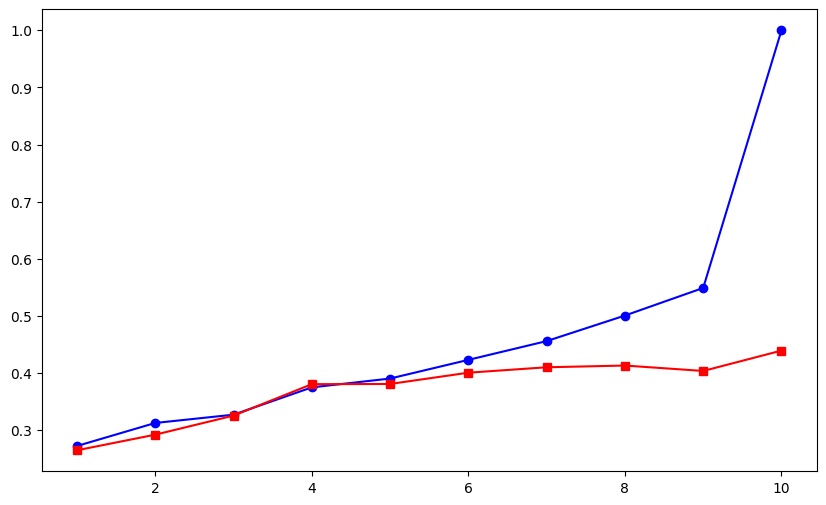

In [ ]:
# Optional: Visualization of Overfitting via Graph
plt.figure(figsize=(10, 6))
# Give a numeric representation to plot 'None', such as 10
plot_depths = [d if d is not None else 10 for d in depths]
plot_labels = [str(d) for d in depths]

plt.plot(plot_depths, results_df['Train Accuracy'], marker='o', label='Train Accuracy', color='blue')
plt.plot(plot_depths, results_df['Test Accuracy'], marker='s', label='Test Accuracy', color='red')



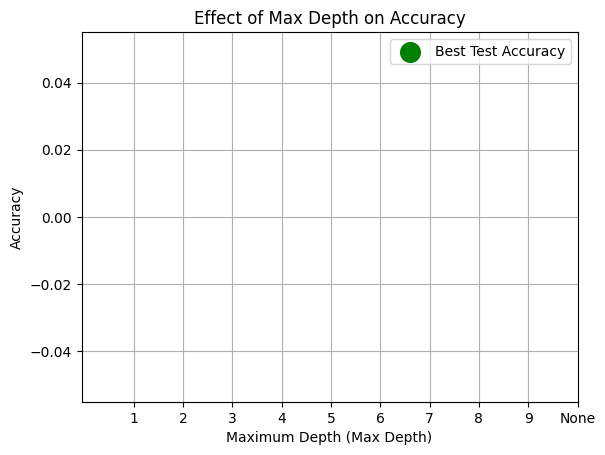



**Analytical Conclusion:**
Max Depth = nan is the best depth providing the highest test accuracy, indicating that the model achieved an optimal balance between complexity and simplicity for generalization.


In [ ]:
# Highlight the best point
best_plot_depth = best_row['Max Depth'] if best_row['Max Depth'] is not None else 10
plt.scatter(best_plot_depth, best_row['Test Accuracy'], color='green', s=200, label='Best Test Accuracy', zorder=5)

plt.xticks(plot_depths, plot_labels)
plt.title('Effect of Max Depth on Accuracy')
plt.xlabel('Maximum Depth (Max Depth)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show() # (Print will only work in a notebook environment.)

print("\n\n**Analytical Conclusion:**")
print(f"Max Depth = {best_row['Max Depth']} is the best depth providing the highest test accuracy, indicating that the model achieved an optimal balance between complexity and simplicity for generalization.")
